In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
Data1=pd.read_csv("gld_price_data.csv")

In [23]:
Data1

,Date,SPX,GLD,USO,SLV,EUR_USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [24]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR_USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [25]:
Data1=Data1.drop("Date", axis = 1)

In [26]:
Data1

,SPX,GLD,USO,SLV,EUR_USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [27]:
Data1.isna().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR_USD    0
dtype: int64

In [28]:
X = Data1.drop("EUR_USD", axis = 1)
y = Data1.EUR_USD

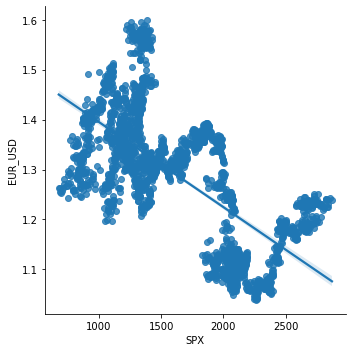

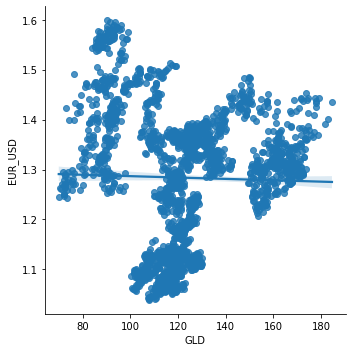

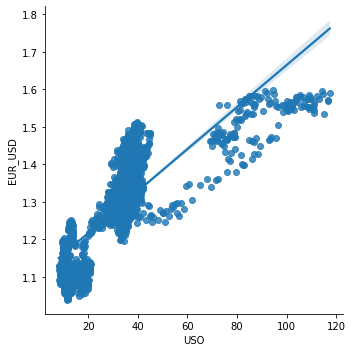

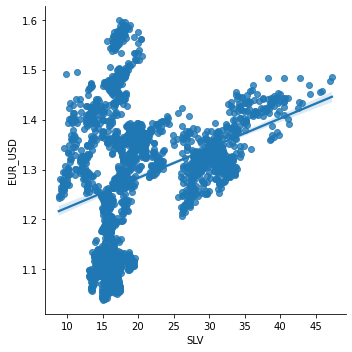

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

X_cols = X.columns
for i in X_cols:
    sns.lmplot(data=Data1, x=i, y="EUR_USD")
plt.show()

In [34]:
fare_srv=Data1.groupby('SPX').EUR_USD.sum().to_frame().reset_index()
import plotly.express as px
px.histogram(data_frame=fare_srv,x='SPX',y='EUR_USD')

In [35]:
fare_srv=Data1.groupby('GLD').EUR_USD.sum().to_frame().reset_index()
import plotly.express as px
px.histogram(data_frame=fare_srv,x='GLD',y='EUR_USD')

In [36]:
fare_srv=Data1.groupby('USO').EUR_USD.sum().to_frame().reset_index()
import plotly.express as px
px.histogram(data_frame=fare_srv,x='USO',y='EUR_USD')

In [37]:
fare_srv=Data1.groupby('SLV').EUR_USD.sum().to_frame().reset_index()
import plotly.express as px
px.histogram(data_frame=fare_srv,x='SLV',y='EUR_USD')

<AxesSubplot:>

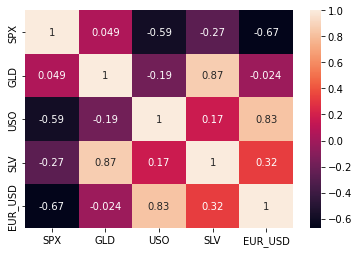

In [38]:
#Correlation
sns.heatmap(Data1.corr(),annot=True)

In [39]:
# Standardisation
Data1.iloc[:,:] = (Data1 - Data1.mean())/Data1.std()
Data1

,SPX,GLD,USO,SLV,EUR_USD
0,-0.399058,-1.626608,2.388288,-0.691569,1.429441
1,-0.399058,-1.596114,2.383166,-0.676764,1.450718
2,-0.467502,-1.615012,2.328872,-0.693402,1.458328
3,-0.458737,-1.630473,2.236164,-0.709475,1.403648
4,-0.508804,-1.544146,2.264847,-0.633762,2.078690
...,...,...,...,...,...
2285,1.960280,0.079762,-0.910810,-0.645041,-0.736344
2286,2.010116,0.068595,-0.894932,-0.642221,-0.752057
2287,2.058814,0.105102,-0.892883,-0.612613,-0.698609
2288,2.072414,0.075467,-0.894420,-0.637991,-0.688232


In [40]:
X = Data1.drop("EUR_USD", axis = 1)
y = Data1.EUR_USD

In [58]:
X1=Data1.USO.values.reshape(2290,1)

# Lineair regression-Skilearn

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.20, random_state=0)

In [60]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred = lr.predict(X_test)
matrix = pd.DataFrame({"Actual" : y_test, "Predict" : y_pred})
matrix

,Actual,Predict
1255,0.517266,0.211485
2100,-1.035819,-0.958256
711,0.964999,0.430520
1328,0.594090,0.076335
53,2.130337,2.135351
...,...,...
2085,-1.246952,-0.947665
1362,0.792217,0.186912
828,0.705807,0.060236
567,0.005724,0.120820


In [62]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [63]:
coef_determination(y_test,y_pred)

0.6915477932383238

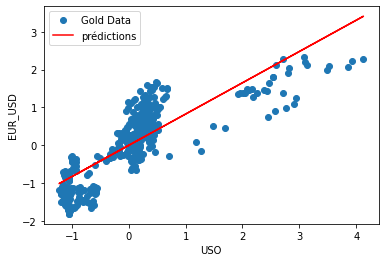

In [65]:
plt.plot(X_test, y_test,'o',label='Gold Data')
plt.plot(X_test,y_pred , c='r',label='prédictions')
plt.xlabel('USO')
plt.ylabel('EUR_USD')
plt.legend()
plt.show()

# Mathematical model

In [46]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # Initialisation des poids et du biais à zéro
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Entraînement par descente de gradient
        for _ in range(self.num_iterations):
            # Calcul de la prédiction
            y_pred = np.dot(X, self.weights) + self.bias

            # Calcul du gradient des poids et du biais
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            # Mise à jour des poids et du biais
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [51]:
model = LinearRegression()
model.fit(X_train, y_train)

In [52]:
y_pred1 = model.predict(X_test)

print(y_pred1)

[ 1.52099677e-01 -1.22894486e+00  9.16113980e-01 -3.93143260e-02
  1.84916722e+00  3.90676732e-01 -1.08897781e+00  5.06689669e-01
  3.79537621e-01 -8.40418477e-01 -9.19275809e-01 -9.99622044e-01
  4.54445986e-01  5.51071632e-01 -1.22835888e+00 -7.19387336e-01
  2.69887030e-01  5.00746936e-01  2.13361422e+00  5.30811151e-02
  1.97111109e+00 -7.17932525e-01  3.89599065e-02  6.49951125e-01
  6.27807561e-01  8.99682280e-01 -6.96813828e-01  5.61843142e-01
  5.28015695e-02 -9.81052889e-01 -1.04824818e+00 -9.97491595e-01
  5.34495508e-02 -1.20724763e+00  4.44689861e-01 -1.93646200e-03
  1.74046557e+00 -7.59619217e-01 -1.29033640e+00  9.26174954e-01
  5.61043241e-01  4.69469189e-01  4.32772660e-01  6.11774533e-01
  5.21520116e-01  6.98845323e-01 -1.28579530e+00  3.76166771e-01
  4.19495227e-01 -1.21253552e+00  1.36902866e-01  4.37547137e-01
 -2.03232257e-03  2.94216245e-01  2.73117332e-01  2.91582580e-01
 -7.53416178e-01  2.59336976e+00  2.57740239e-01 -1.15722459e+00
  1.41857269e+00 -6.67031

In [53]:
coef_determination(y_test,y_pred1)

0.7476229334425679